# Caracterizarea texturilor

## Introducere

Termenul de textura este legat de perceptia (vizuala si tactila) a unui material. Putem considera textura ca o proprietate a obiectelor sau a materialelor, ce caracterizeaza structura lor fizica din punctul de vedere al dimensiunii, formei, orientarii, aranjamentului si proportiei partilor constituente ale acesteia.

Caracterizarea texturilor se poate face:
- din punct de vedere determinist considerand repetarea unor motive de baza (spatial), in diferite directii.
- din punct de vedere probabilist considerand ca textura este generata de ceva aleator, fara vreo repetabilitate localizabila.
- mixt considerand ca textura poate fi vazuta ca o structura spatiala constituita din mai multe motive de baza, dipuse în mod aleator (in spatiu sau/si amplitudine)



## Caracterizarea texturilor prin matrice de coocurenta

In general matricea de coocurenta este aproximarea densitatii de probabilitate de ordin 2 a unei perechi de variabile aleatoare. In cazul imaginilor vom considera ca cele doua variabile aleatoare sunt valorile nivelurilor de gri a 2 pixeli cu pozitie relativa stabila unul fata de altul. 

Se stabileste un vector de translatie spatiala $t$ ce defineste separatia spatiala a celor 2 pixeli (pozitia relativa a celui de-al doilea pixel fata de primul - considerat originea axei de coordonate). Pentru orice 2 pixeli separati de acest vector de translatie se calculeaza probabilitatea de aparitie a perechii de pixeli care au nivelurile de gri $a$ si respectiv $b$:

\begin{equation}
M_t(a, b) = Card\{ (x,x+t)∈R×R | f(x) = a \text{  si  } f(x+t) = b\} / Card\{( (x,x+t)∈R×R \} .
\end{equation}

Asadar matricea de coocurenta va fi o matrice patrata, cu numar de linii si coloane egal cu numarul de niveluri de gri din imaginea/regiunea de textura considerata. <i>In practica, pentru reducerea calculelor, numarul de niveluri de gri este redus la 8 sau la 16.</i>

Distinctia intre texturi diferite poate fi facuta in primul rand prin inspectia (examinarea de ansamblu) a matricii de coocurenta, printr-o vizualizare tridimensionala a matricii (de exemplu, pentru o zona uniforma, matricea de coocurenta are o singura componenta nenula, indiferent de vectorul de translatie ales). Pentru o comparatie numerica au fost definiti mai multi indici de natura statistica (omogenitate, uniformitate, entropie, contrast, etc.) ce caracterizeaza distributia componentelor matricei de coocurenta.

In Python o implementare directa a calculului matricei de coocurenta si a parametrilor statistici calculati pe aceasta se gasesc chiar in skimage cu <i>greycomatrix</i> si <i>greycoprops</i>.


Utilizati greycomatrix si greycoprops pentru o textura mica facuta local si urmariti rezultatele. Modificati distanta si unghiul si observati cum se modifica matricea de coocurenta.

<i>Atentie: vectorul de translatie se va da sub forma distanta si unghi in greycomatrix.</i>

In [3]:
import numpy as np
from skimage import io, color, feature 
import matplotlib.pyplot as plt


image = np.array([[0, 0, 2, 1],
                  [0, 0, 1, 1],
                  [0, 2, 2, 2],
                  [2, 2, 3, 3]], dtype=np.uint8)

image = np.array([[0, 0, 2, 2],
                  [0, 0, 2, 2],
                  [0, 0, 2, 2],
                  [0, 0, 2, 2]], dtype=np.uint8)

print(image)
print('\n')
# feature.graycomatrix (imagine, distanta, unghi, numar de niveluri gri)
result = feature.graycomatrix(image, [1], [0], levels = 4)
print(result[:,:,0,0])

print('\n')
result = feature.graycomatrix(image, [1], [np.pi/4], levels = 4, normed = 'True')

print(np.shape(result))


print(result[:,:,0,0])
#print(result[:,:,0,1])

print('\n')
contr = feature.graycoprops(result, prop = 'contrast')
print(contr)
#plt.figure(), plt.imshow(result[:,:,0,0], cmap = 'gray'), plt.colorbar(), plt.show()

[[0 0 2 2]
 [0 0 2 2]
 [0 0 2 2]
 [0 0 2 2]]


[[4 0 4 0]
 [0 0 0 0]
 [0 0 4 0]
 [0 0 0 0]]


(4, 4, 1, 1)
[[0.33333333 0.         0.33333333 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.        ]]


[[1.33333333]]


Folosind greycomatrix si greycoprops, scrieti o functie care sa calculeze parametri statistici pe matricea de coocurenta si sa ii intoarca intr-un vector.

In [4]:
import numpy as np
from skimage import io, color, feature 
import matplotlib.pyplot as plt

L = 256 #numarul initial de niveluri de gri
d = 16 #de cate ori micsorez numarul de niveluri de gri

def texture_features_GCM(img):
    result = feature.graycomatrix(img, [1], [0,  np.pi/4,  np.pi/2], levels=int(L/d))
    fc = feature.graycoprops(result, prop = 'contrast')
    fd = feature.graycoprops(result, prop = 'dissimilarity')
    fh = feature.graycoprops(result, prop = 'homogeneity') 
    fa = feature.graycoprops(result, prop = 'ASM') 
    fe = feature.graycoprops(result, prop = 'energy') 
    fcc = feature.graycoprops(result, prop = 'correlation') 
    
    feat = np.concatenate((fc,fd,fh,fa,fe,fcc), axis = 1)
    return feat


print(texture_features_GCM(image))

[[1.33333333 1.33333333 0.         0.66666667 0.66666667 0.
  0.73333333 0.73333333 1.         0.33333333 0.33333333 0.5
  0.57735027 0.57735027 0.70710678 0.5        0.5        1.        ]]


Cititi o imagine ce contine o textura. Micsorati numarul de niveluri de gri din aceasta imagine. Impartiti imaginea in blocuri de dimensiune fixa si calculati pe fiecare bloc parametri statistici pe baza matricei de coocurenta (folosind functia de mai sus). Folositi o suprapunere de 50% intre blocuri.

Modificati imaginea. Observati cum se schimba masurile.

(1024, 1024)


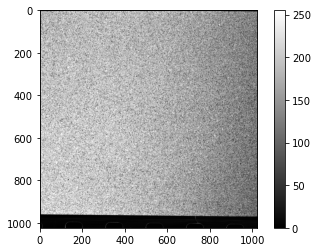

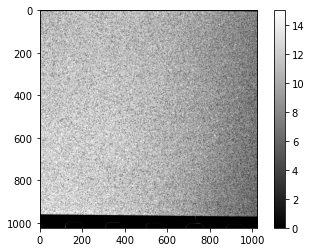

[[3.84151786 6.64852608 3.63665675 ... 0.84642317 0.72472829 0.85494839]
 [2.03298611 5.01007811 3.70709325 ... 0.9002206  0.7404459  0.80909723]
 [2.06845238 4.80171328 3.48883929 ... 0.90052109 0.75656784 0.82432461]
 ...
 [0.33928571 0.87427564 0.75744048 ... 0.97436191 0.93401782 0.94310667]
 [0.33655754 0.70748299 0.57614087 ... 0.97244808 0.94263177 0.95354947]
 [0.2874504  0.68279164 0.49255952 ... 0.97347082 0.93679824 0.95543081]]
(961, 18)


In [5]:
import numpy as np
from skimage import io, color, feature 
import matplotlib.pyplot as plt

L = 256 #numarul initial de niveluri de gri
d = 16 #de cate ori micsorez numarul de niveluri de gri

# verificare pe imagini
image = io.imread('1.4.11.tiff')
dims = np.shape(image)
print(dims)
plt.figure(), plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# se micsoreaza numarul de niveluri de gri
image = np.uint8(image/d)
plt.figure(),plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

size_patch = 64 # cate linii / coloane are blocul pe care calculez matricea de coocurenta
step = int(size_patch/2) # pasul de parcurgere
nr_patch = int(dims[0]/step - 1) # cate blocuri am   

features1 = np.zeros([nr_patch*nr_patch, 18]) # 18 sunt numarul de masuri calculate pe matricea de coocurenta

index = 0
for i in range(nr_patch):
    for j in range(nr_patch):
        img = image[i*step:(i+2)*step, j*step:(j+2)*step]
        features1[index, :] = texture_features_GCM(img)
        index += 1
        
print(features1)
print(np.shape(features1))

Folosind codul de mai sus, calculati masuri pe matricea de coocurenta a imaginii 'textura_mare1.tiff'. Clusterizati aceste date cu ajutorul algoritmului K-Means si folosind etichetele date de clusterizare segmentati imaginea. Ce observati?

Incercati acelasi cod pe 'textura_mare.tiff'.

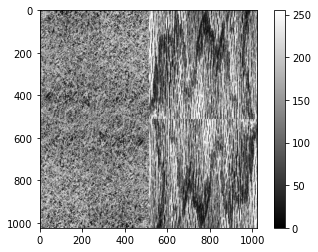

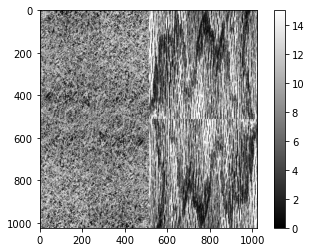

(1024, 1024)
(961, 18)


In [7]:
from sklearn import cluster

L = 256 #numarul initial de niveluri de gri
d = 16 #de cate ori micsorez numarul de niveluri de gri

image = io.imread('textura_mare.tiff')
dims = np.shape(image)
plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# se micsoreaza numarul de niveluri de gri
image = np.uint8(image/d)
plt.figure(),plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

print(np.shape(image))

#image[:,512:1023]=10
#plt.figure(),plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# impart imaginea in blocuri (suprapuse 50%) de size_patch x size_patch
size_patch = 64
step = int(size_patch/2)
nr_patch = int(dims[0]/step - 1)  

features1 = np.zeros([nr_patch*nr_patch,18])

index = 0
for i in range(nr_patch):
    for j in range(nr_patch):
        
        img = image[i*step:(i+2)*step, j*step:(j+2)*step]
#        features1[i*nr_patch+j, :] = texture_features_GCM(img)
        features1[index, :] = texture_features_GCM(img)
        index +=  1

#         
print(np.shape(features1))

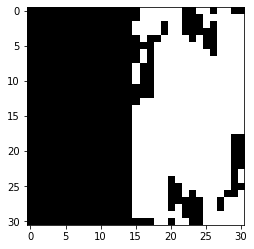

(<Figure size 432x288 with 1 Axes>,
 None)

In [8]:
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(features1)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

plt.figure(),plt.imshow(np.reshape(etichete,(nr_patch, nr_patch)), cmap = 'gray'),plt.show()

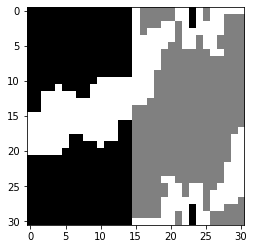

(<Figure size 432x288 with 1 Axes>,
 None)

In [9]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(features1)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

plt.figure(),plt.imshow(np.reshape(etichete,(nr_patch, nr_patch)), cmap = 'gray'),plt.show()

## Caracterizarea texturilor prin matrice de izosegmente

Un izosegment de nivele de gri (numit uneori si plaja sau runlength) este o multime liniara, de lungime maxima, formata din pixeli consecutivi ce au acelasi nivel de gri, orientata pe o anumita directie. Lungimea unui izosegment este numarul de pixeli ce formeaza respectiva multime. Pentru o orientare (directie) fixata $θ$, se poate determina o matrice de izosegmente, ale carei elemente $M_θ(a, b)$ reprezinta numarul de izosegment ede lungime $b$ data, formate din pixeli de un nivel de gri $a$ dat si orientate pe directia $θ$. Matricea rezultata are $M$ linii (egal cu numarul de nivele de gri din imagine) si un numar de coloane $N_θ$, egal cu lungimea maxima a izosegmentelor pe directia considerata.

Sa se urmareasca in codul de mai jos o implementare simpla a calculului matricei de izosegmente pe directie orizontala.

In [10]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

def GLRLM(img, grayLevel, runLength):
    rlm = np.zeros([grayLevel, runLength])
    counter = 0
    dims = np.shape(img)
    # pentru fiecare pixel compar cu cel din dreapta
    for i in range(dims[0]):
        for j in range(dims[1]):
            val = img[i, j] # valoarea in pixelul curent
            # daca sunt la ultima coloana am ajuns la capatul izosegmentului
            if j==dims[1]-1:
                # incrementez RLM-ul si resetez counter
                rlm[val, counter] += 1
                counter = 0
            else:
                nextVal = img[i, j + 1] # valoarea in pixelul urmator
                # daca valorile sunt egale inseamna ca sunt in interiorul izosegmentului
                # deci incrementez lungimea
                if nextVal == val:
                    counter += 1
                    # altfel am ajuns la capatul izosegmentului 
                    # incrementez RLM-ul si resetez counter
                else:
                    rlm[val, counter] += 1
                    counter = 0
                
    return rlm

Pe baza matricei de izosegmente se pot calcula diverse marimi cum ar fi proportia izosegmentelor scurte, proportia izosegmentelor lungi, heterogenitatea (non-uniformitatea) valorilor, heterogenitatea (non-uniformitatea) lungimilor, proportia izosegmentelor. 

Acestea se pot calcula astfel:

In [11]:
def paramGLRLM(rlm):
    rez=i = np.zeros([1,5])
    [h,w] = np.shape(rlm)
    i = np.arange(w)+1
    hist = np.dot(rlm,np.transpose(i))
    slp = np.sum(rlm)
    rez[0,4] = slp/np.sum(hist)
    i = i*i
    i = i[np.newaxis]
    t = np.dot(np.ones([h,1]),i)
    rez[0,0] = np.sum(np.sum(rlm/t))/slp
    rez[0,1] = np.sum(np.sum(rlm*t))/slp
    rez[0,2] = np.sum( np.sum(rlm, axis = 1) * np.sum(rlm, axis = 1), axis = 0 )/slp
    rez[0,3] = np.sum( np.sum(rlm, axis = 0) * np.sum(rlm, axis = 0) )/slp
    
    return rez

Scrieti un cod care sa calculeze matricea de izosegmente si parametri calculati pe aceasta matrice pe o imagine de textura mica, facuta local. 

Cum faceti sa calculati matricea de izosegmente pe directia verticala?

In [16]:
import numpy as np
from skimage import io, color, feature 
import matplotlib.pyplot as plt

image = np.array([[0, 0, 1, 1],
                  [0, 0, 1, 1],
                  [0, 2, 2, 2],
                  [2, 2, 3, 3]], dtype=np.uint8)

image = np.array([[0, 2, 2, 2],
                  [0, 2, 2, 2],
                  [0, 2, 2, 2],
                  [0, 2, 2, 2]], dtype=np.uint8)


izo = GLRLM(image, 4, 4)
param_izo = paramGLRLM(izo)

print(izo)
print('\n')
print(param_izo)

[[4. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 0.]]


[[0.55555556 5.         4.         4.         0.5       ]]


Scrieti un cod care sa calculeze matricea de izosegmente si parametri calculati pe ea pentru o imagine reala care contine o textura folosind aceeasi tip de impartire in blocuri ca si la exercitiile anterioare (cu matrice de coocurenta). Nu uitati sa micsorati si numarul de niveluri de gri.

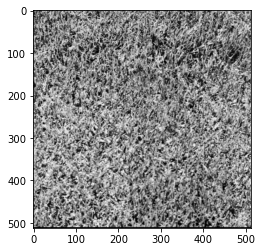

[[8.82603494e-01 1.62063995e+00 2.92580859e+02 2.55376218e+03
  8.46923828e-01]
 [8.78152440e-01 1.63209733e+00 2.96042874e+02 2.51200579e+03
  8.42773438e-01]
 [8.83043339e-01 1.59471112e+00 3.02211842e+02 2.56353981e+03
  8.49365234e-01]
 ...
 [8.40499952e-01 4.66880616e+00 2.76472401e+02 2.05972978e+03
  7.60742188e-01]
 [8.46928457e-01 4.59873016e+00 2.70688889e+02 2.11690095e+03
  7.69042969e-01]
 [8.56118672e-01 4.39478585e+00 2.69211049e+02 2.21642768e+03
  7.86621094e-01]]
(225, 5)


In [17]:
import numpy as np
from skimage import io, color, feature 
import matplotlib.pyplot as plt

L = 256
d = 16
image = io.imread('1.1.01.tiff')
dims = np.shape(image)
#image = np.uint8(color.rgb2gray(image)*255)
#plt.figure(), plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# se micsoreaza numarul de niveluri de gri
image = np.uint8(image/d)
plt.figure(),plt.imshow(image, cmap = 'gray'),plt.show()

size_patch = 64
step = int(size_patch/2)
nr_patch = int(dims[0]/step - 1)  

features1 = np.zeros([nr_patch*nr_patch, 5])

index = 0
for i in range(nr_patch):
    for j in range(nr_patch):
        img = image[i*step:(i+2)*step, j*step:(j+2)*step]
        rlm = GLRLM(img, int(L/d), size_patch)
        features1[index, :] = paramGLRLM(rlm)
        index += 1
        
print(features1)
print(np.shape(features1))

Rulati codul pe imaginea care contine 2 texturi si segmentati imaginea cu ajutorul clusterizatii K-Means.

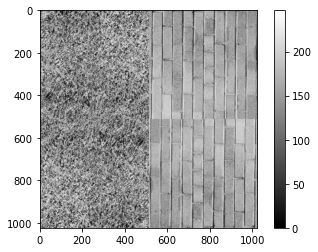

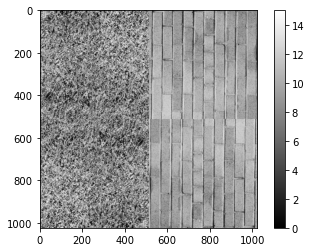

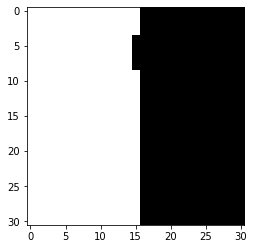

(<Figure size 432x288 with 1 Axes>,
 None)

In [18]:
from sklearn import cluster

L = 256 #numarul initial de niveluri de gri
d = 16 #de cate ori micsorez numarul de niveluri de gri


image = io.imread('textura_mare1.tiff')
dims = np.shape(image)
plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# se micsoreaza numarul de niveluri de gri
image = np.uint8(image/d)
plt.figure(),plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# impart imaginea in blocuri (suprapuse 50%) de size_patch x size_patch
size_patch = 64
step = int(size_patch/2)
nr_patch = int(dims[0]/step - 1)  

features1 = np.zeros([nr_patch*nr_patch,5])

index = 0
for i in range(nr_patch):
    for j in range(nr_patch):
        
        img = image[i*step:(i+2)*step, j*step:(j+2)*step]
        
        rlm = GLRLM(img, int(L/d), size_patch)
        features1[index, :] = paramGLRLM(rlm)
        index += 1


#         
kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(features1)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

plt.figure(),plt.imshow(np.reshape(etichete,(nr_patch, nr_patch)), cmap = 'gray'),plt.show()

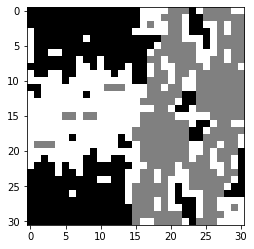

(<Figure size 432x288 with 1 Axes>,
 None)

In [13]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(features1)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

plt.figure(),plt.imshow(np.reshape(etichete,(nr_patch, nr_patch)), cmap = 'gray'),plt.show()

TEMA: Scrieti un cod care sa foloseasca ambele tipuri de trasaturi (atat pe matricea de coocurenta, cat si pe matricea de izosegmente), sa faca segmentarea prin clusterizare cu K-Means si sa calculeze precizia si reamintirea.

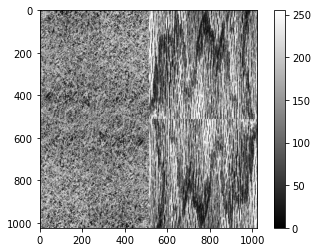

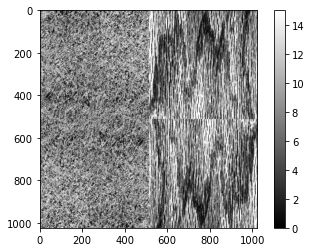

In [96]:
from sklearn import cluster

L = 256 #numarul initial de niveluri de gri
d = 16 #de cate ori micsorez numarul de niveluri de gri


image = io.imread('textura_mare.tiff')
dims = np.shape(image)
plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# se micsoreaza numarul de niveluri de gri
image = np.uint8(image/d)
plt.figure(),plt.imshow(image, cmap = 'gray'), plt.colorbar(), plt.show()

# impart imaginea in blocuri (suprapuse 50%) de size_patch x size_patch
size_patch = 64
step = int(size_patch/2)
nr_patch = int(dims[0]/step - 1)  

features1 = np.zeros([nr_patch*nr_patch,5])
features2 = np.zeros([nr_patch*nr_patch,18])


index = 0
for i in range(nr_patch):
    for j in range(nr_patch):
        
        img = image[i*step:(i+2)*step, j*step:(j+2)*step]
        rlm = GLRLM(img, int(L/d), size_patch)
        features1[index, :] = paramGLRLM(rlm)
        features2[index, :] = texture_features_GCM(img)
        index += 1

features = np.concatenate((features1, features2), axis=1)


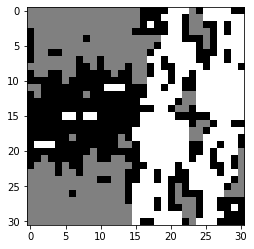

(<Figure size 432x288 with 1 Axes>,
 None)

In [98]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(features1)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

plt.figure(),plt.imshow(np.reshape(etichete,(nr_patch, nr_patch)), cmap = 'gray'),plt.show()

## Tema
Implementati descrierea de textura neomogena din MPEG-7